## Logistic Regression

In [2]:
import random
import math
import matplotlib.pyplot as plt

In [3]:
random.seed(1)
X = [random.uniform(0, 10) for _ in range(100)]

y = [1 if x + random.uniform(-2, 2) > 5 else 0 for x in X]

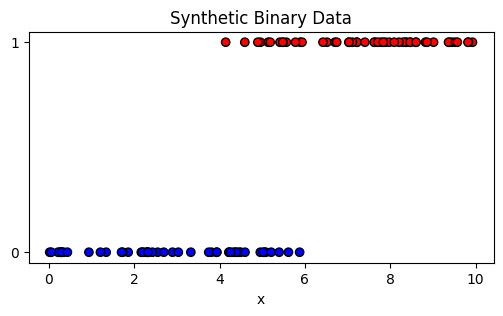

In [4]:
plt.figure(figsize=(6,3))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k')
plt.xlabel("x")
plt.yticks([0,1])
plt.title("Synthetic Binary Data")
plt.show()

In [5]:
data = list(zip(X, y))
random.shuffle(data)
split = int(0.8 * len(data))
train, test = data[:split], data[split:]
X_train, y_train = zip(*train)
X_test,  y_test  = zip(*test)

In [6]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = 0.0
        self.b = 0.0

    def sigmoid(self, z):
        return 1 / (1 + math.exp(-z))

    def fit(self, X, y):
        n = len(X)
        for _ in range(self.n_iter):
            dw, db = 0.0, 0.0
            for xi, yi in zip(X, y):
                z = self.w * xi + self.b
                pi = self.sigmoid(z)
                dw += (pi - yi) * xi
                db += (pi - yi)
                
            self.w -= self.lr * (dw / n)
            self.b -= self.lr * (db / n)

    def predict_proba(self, X):
        return [self.sigmoid(self.w * xi + self.b) for xi in X]

    def predict(self, X, threshold=0.5):
        return [1 if p >= threshold else 0 for p in self.predict_proba(X)]

In [7]:
model = LogisticRegressionScratch(lr=0.1, n_iter=2000)
model.fit(X_train, y_train)
print(f"Learned weight w = {model.w:.4f}, bias b = {model.b:.4f}")

Learned weight w = 1.3376, bias b = -6.5401


In [8]:
y_pred = model.predict(X_test)
accuracy = sum(yt == yp for yt, yp in zip(y_test, y_pred)) / len(y_test)
print(f"Test Accuracy: {accuracy:.3%}")

Test Accuracy: 80.000%


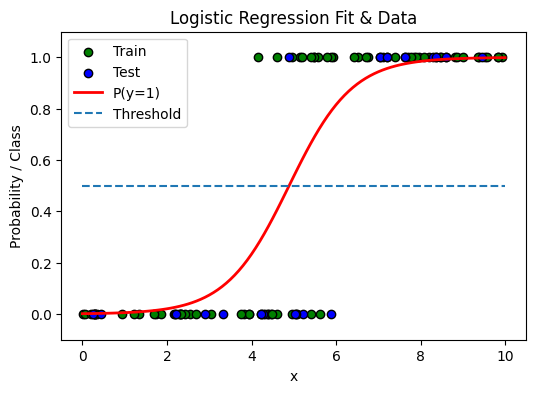

In [9]:
plt.figure(figsize=(6,4))

plt.scatter(X_train, y_train, color='green', label='Train', edgecolors='k')
plt.scatter(X_test,  y_test,  color='blue',  label='Test',  edgecolors='k')

x_vals = [i*0.1 for i in range(0, 101)]
probs  = model.predict_proba(x_vals)
plt.plot(x_vals, probs, 'r-', linewidth=2, label='P(y=1)')

plt.hlines(0.5, xmin=0, xmax=10, linestyles='--', label='Threshold')

plt.xlabel("x")
plt.ylabel("Probability / Class")
plt.title("Logistic Regression Fit & Data")
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

### What we understood:

`LogisticRegressionScratch()` tries to separate two classes (0 and 1) by learning a line and passing it through a sigmoid function — an S-shaped curve that compresses any number into a value between 0 and 1.

This output is behaved as the probability of being class 1.

We start from `w = 0`, `b = 0` and use gradient descent (step-by-step updates) in order to reduce an error called cross-entropy loss, which checks how far predictions are from true labels.

Logistic regression is great for binary classification:
- If probability ≥ 0.5 → class 1  
- If probability < 0.5 → class 0